# Progetto IDS 2024/2025

Questo progetto ha come obiettivo analitico la scoperta di un'eventuale correlazione tra varie condizioni psicologihe e l'utilizzo intenso dei social.

Una volta aggiunto il dataSet, andremo a pulire i dati, trasformarli, visualizzarli e testarli.

Successivamente, alleneremo un metodo supervisioanto per prevedere il MentalScore di una persona.

Link al dataset: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data


In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MultiLabelBinarizer

dataSet = pd.read_csv( "smmh.csv" )


Visualizziamo le colone del dataSet in analisi

In [23]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [24]:
dataSet.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Verifichiamo quanti nan troviamo nella varie colonne


In [25]:
# Numero di NaN in ogni colonna
print(dataSet.isna().sum())


Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

Come possiamo notare dalla visualizzazione del dataSet, vi sono delle colonne che devono essere trasformate per poter essere manipolate ed analizzate.

Queste colonne sono le prime 8, come ci mostra la dataset.info(), poichè sono di tipo object.
Procediamo alla trasformazione

Analizzando il dataSet, vi sono delle colonne che possono essere trattate con label enconding, altre bisogna trattarle diversamente.

# PULIZIA E TRASFORMAZIONI

Per alcune di queste colonne utilizzerò il Label Encoding per gestire meglio le colonne

### Age

Procediamo con la trasformazione della colonna riguardante l'età

In [26]:
dataSet["1. What is your age?"].astype(int)

0      21
1      21
2      21
3      21
4      21
       ..
476    24
477    26
478    29
479    21
480    53
Name: 1. What is your age?, Length: 481, dtype: int64

### Gender
Procediamo alla trasformazione della colonna Gender. 

Per comodità, utilizzerò 3 categorie, dal momento che nel dataSet sono presenti diversi riferimenti ai non binary.

In [27]:

#creo una nuova colonna con i valori corrispondenti 
dataSet["GenderCode"] = 0  
dataSet.loc[ dataSet["2. Gender"] == "Male", "GenderCode" ] = 2
dataSet.loc[ dataSet["2. Gender"] == "Female", "GenderCode" ] = 1

#sposto la colonna per visualizzare meglio i valori
column  = dataSet.pop("GenderCode")
dataSet.insert( 3, "GenderCode", column )


### Relationship Status

Procediamo alla trasformazione della colonna Relationship Status

In [28]:
#creo una nuova colonna con i valori corrispondenti 
dataSet["RelationshipCode"] = 0  
dataSet.loc[ dataSet["3. Relationship Status"] == "Single", "RelationshipCode" ] = 0
dataSet.loc[ dataSet["3. Relationship Status"] == "In a relationship", "RelationshipCode" ] = 1
dataSet.loc[ dataSet["3. Relationship Status"] == "Married", "RelationshipCode" ] = 2
dataSet.loc[ dataSet["3. Relationship Status"] == "Divorced", "RelationshipCode" ] = 3

#sposto la colonna per visualizzare meglio i valori
column  = dataSet.pop("RelationshipCode")
dataSet.insert( 5, "RelationshipCode", column )



### Occupation Status

Controlliamo la presenza di doppi valori in questa colonna

In [29]:

dataSet["4. Occupation Status"] = dataSet["4. Occupation Status"].astype(str)
virgole = dataSet[dataSet["4. Occupation Status"].str.contains(",")]
print(virgole["4. Occupation Status"].unique())


[]


Data l'assenza di doppi valori, possiamo passare alla trasformazione della colonna

In [30]:
#creo una nuova colonna con i valori corrispondenti 
dataSet["OccupationCode"] = 0  
dataSet.loc[ dataSet["4. Occupation Status"] == "School Student", "OccupationCode" ] = 0
dataSet.loc[ dataSet["4. Occupation Status"] == "University Student", "OccupationCode" ] = 1
dataSet.loc[ dataSet["4. Occupation Status"] == "Salaried Worker", "OccupationCode" ] = 2
dataSet.loc[ dataSet["4. Occupation Status"] == "Retired", "OccupationCode" ] = 3

#sposto la colonna per visualizzare meglio i valori
column  = dataSet.pop("OccupationCode")
dataSet.insert( 7, "OccupationCode", column )


### Organization Affiliated With

Questa colonna è compicata da trasformare, poichè troviamo dei valori multipli, separati da virgola.

Come prima cosa veririchiamo la varietà di tali valori

In [31]:
# Controlla se ci sono valori con la virgola
dataSet["5. What type of organizations are you affiliated with?"] = dataSet["5. What type of organizations are you affiliated with?"].astype(str)  # assicurati sia stringa
with_commas = dataSet[dataSet["5. What type of organizations are you affiliated with?"].str.contains(",")]
print(with_commas["5. What type of organizations are you affiliated with?"].unique())

['School, University' 'School, Private' 'University, Company'
 'Company, Private' 'University, Goverment, Private'
 'University, Company, Private' 'University, Private' 'University, N/A'
 'School, University, Private' 'University, Goverment'
 'University, Company, Goverment' 'School, Company' 'School, N/A']


Per la gestione di questi valori mulitpli, creo delle nuove colonne con i label e inserisco 1 nel caso di corrispondenza, 0 altrimenti

In [32]:

is_na = dataSet["5. What type of organizations are you affiliated with?"].isna()

def clean_organization(val):
    if pd.isna(val):
        return []
    cleaned = [x.strip() for x in val.split(",") if x.strip().lower() not in ["n/a", "na", "nan", "none", ""]]
    return cleaned

dataSet["organization_list"] = dataSet["5. What type of organizations are you affiliated with?"].apply(clean_organization)


mlb = MultiLabelBinarizer()
org_encoded = pd.DataFrame(mlb.fit_transform(dataSet["organization_list"]),columns=mlb.classes_,index=dataSet.index)

org_encoded["Other"] = dataSet["organization_list"].apply(lambda x: 1 if len(x) == 0 else 0)
dataSet = pd.concat([dataSet, org_encoded], axis=1)
del dataSet["organization_list"]


#sposto le nuove colonne per una migliore visualizzazione
column  = dataSet.pop("Company")
dataSet.insert( 9, "Company", column )

column  = dataSet.pop("Goverment")
dataSet.insert( 10, "Goverment", column )

column  = dataSet.pop("Private")
dataSet.insert( 11, "Private", column )

column  = dataSet.pop("School")
dataSet.insert( 12, "School", column )

column  = dataSet.pop("University")
dataSet.insert( 13, "University", column )

column  = dataSet.pop("Other")
dataSet.insert( 14, "Other", column )



### Social Media

Procediamo con la trasformazione della colonna che rappresenta l'utilizzo o meno dei social media

In [33]:
#creo una nuova colonna con i valori corrispondenti 
dataSet["SocialCode"] = 0  
dataSet.loc[ dataSet["6. Do you use social media?"] == "Yes", "SocialCode" ] = 1


#sposto la colonna per visualizzare meglio i valori
column  = dataSet.pop("SocialCode")
dataSet.insert( 16, "SocialCode", column )



### Which Social Media

Per questo specifico progetto questa colonna può essere droppata, poichè non cerco la correlazione tra un determinato social e una patologia, ma semplicemente sull'utilizzo o meno.

In [ ]:
dataSet = dataSet.drop("7. What social media platforms do you commonly use?",axis=1)

### Average Time

Procediamo alla trasformazione della colonna riguardante il tempo medio trascorso al giorno sui social

In [35]:

dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'Less than an Hour', 'AverageTimeCode'] = 0.5
dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'Between 1 and 2 hours', 'AverageTimeCode'] = 1.5
dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'Between 2 and 3 hours', 'AverageTimeCode'] = 2.5
dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'Between 3 and 4 hours', 'AverageTimeCode'] = 3.5
dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'Between 4 and 5 hours', 'AverageTimeCode'] = 4.5
dataSet.loc[dataSet['8. What is the average time you spend on social media every day?'] == 'More than 5 hours', 'AverageTimeCode'] = 6

column  = dataSet.pop("AverageTimeCode")
dataSet.insert( 18, "AverageTimeCode", column ) 


#visualizzo tutte le trasformazioni 
dataSet.info()
dataSet.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   GenderCode                                                                                                            481 non-null    int64  
 4   3. Relat

,Timestamp,1. What is your age?,2. Gender,GenderCode,3. Relationship Status,RelationshipCode,4. Occupation Status,OccupationCode,5. What type of organizations are you affiliated with?,Company,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,2,In a relationship,1,University Student,1,University,0,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,1,Single,0,University Student,1,University,0,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,1,Single,0,University Student,1,University,0,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,1,Single,0,University Student,1,University,0,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,1,Single,0,University Student,1,University,0,...,4,4,5,5,3,3,3,4,4,1


Ora creo un datSet più pulito su cui lavorare, tenendo solo le colonne numeriche

In [36]:
dataSetNumeric = dataSet.select_dtypes(include=["int64", "float64"])
dataSetNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 24 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   1. What is your age?                                                                                                  481 non-null    float64
 1   GenderCode                                                                                                            481 non-null    int64  
 2   RelationshipCode                                                                                                      481 non-null    int64  
 3   OccupationCode                                                                                                        481 non-null    int64  
 4   Company 

# VISUALIZZAZIONE

Le colonne indicizzate dalle 9 alla 20, sono dei valori tra 1 e 5 e sono le risposte alle domande che troviamo nelle label delle colonne stesse.

Nella scala:
- 1 indica il valore minimo 
- 5 indica il valore massimo

Qui di seguito inizieremo la parte della visualizzazione, cercando di mostrare la correlazione tra i social e vari sintomi.

### Preoccupazione

Procediamo con il boxplot per la visualizzazione della correlazione tra Preoccupazione e l'utilizzo dei Social

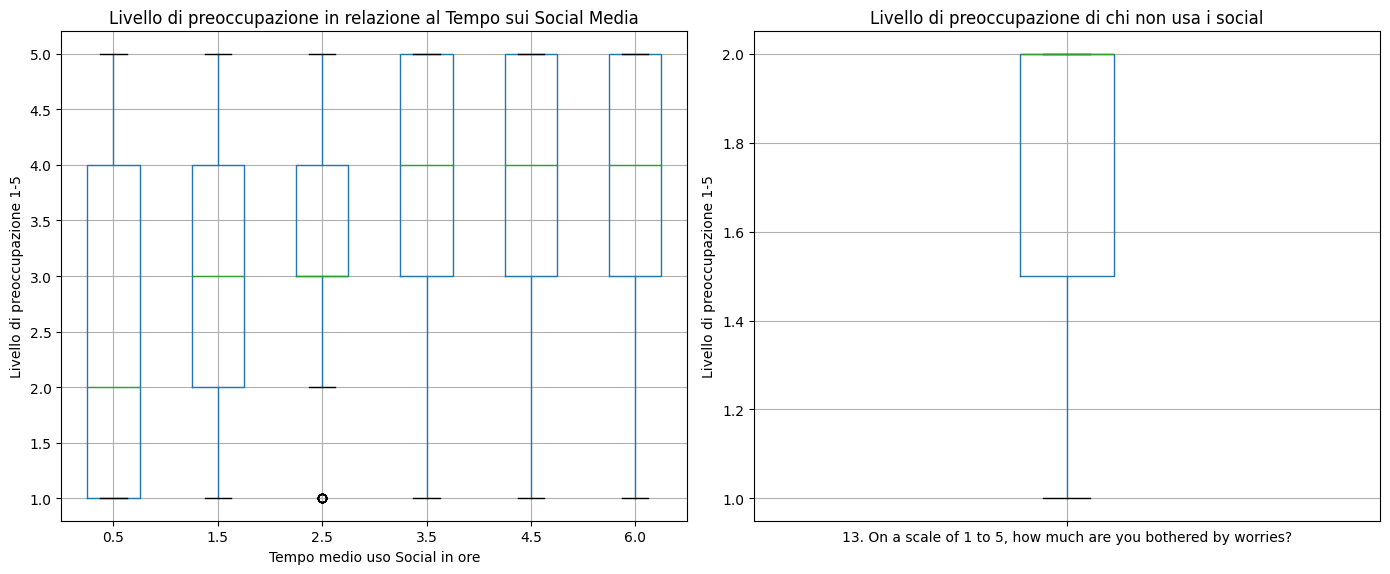

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Primo boxplot per gli utenti dei social media
yesSocial = dataSetNumeric[dataSetNumeric['SocialCode'] == 1]
yesSocial.boxplot(
    column="13. On a scale of 1 to 5, how much are you bothered by worries?", 
    by="AverageTimeCode", 
    ax=axes[0]
)

axes[0].set_title("Livello di preoccupazione in relazione al Tempo sui Social Media")
axes[0].set_xlabel("Tempo medio uso Social in ore")
axes[0].set_ylabel("Livello di preoccupazione 1-5")

# Secondo boxplot per chi non usa i social
noSocial = dataSetNumeric[dataSetNumeric['SocialCode'] == 0]
noSocial.boxplot(
    column="13. On a scale of 1 to 5, how much are you bothered by worries?",
    ax=axes[1]
)
axes[1].set_title("Livello di preoccupazione di chi non usa i social")
axes[1].set_xlabel("")
axes[1].set_ylabel("Livello di preoccupazione 1-5")


plt.suptitle("")
plt.tight_layout()
plt.show()

### Distrazione

Procediamo con il boxplot per la visualizzazione della correlazione tra Distrazione e l'utilizzo dei Social

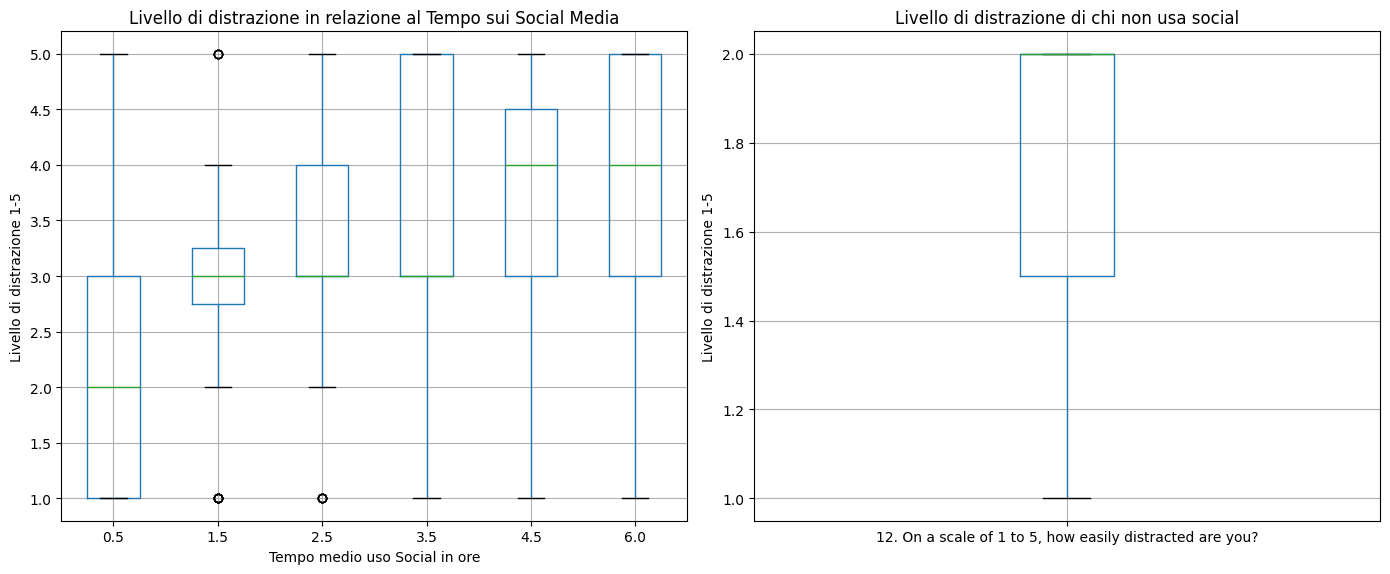

In [38]:

# Creare una figura con due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 riga, 2 colonne

# Primo boxplot per gli utenti dei social media
yesSocial.boxplot(
    column="12. On a scale of 1 to 5, how easily distracted are you?", 
    by="AverageTimeCode", 
    ax=axes[0]
)
axes[0].set_title("Livello di distrazione in relazione al Tempo sui Social Media")
axes[0].set_xlabel("Tempo medio uso Social in ore")
axes[0].set_ylabel("Livello di distrazione 1-5")

# Secondo boxplot per gli utenti dei social media
noSocial.boxplot(
    column="12. On a scale of 1 to 5, how easily distracted are you?",
    ax=axes[1]
)
axes[1].set_title("Livello di distrazione di chi non usa social")
axes[1].set_xlabel("  ")
axes[1].set_ylabel("Livello di distrazione 1-5")


plt.suptitle("")
plt.tight_layout()
plt.show()


### Difficoltà a concentrarsi

Procediamo con il boxplot per la visualizzazione della correlazione tra Difficoltà a Concentrarsi e l'utilizzo dei social

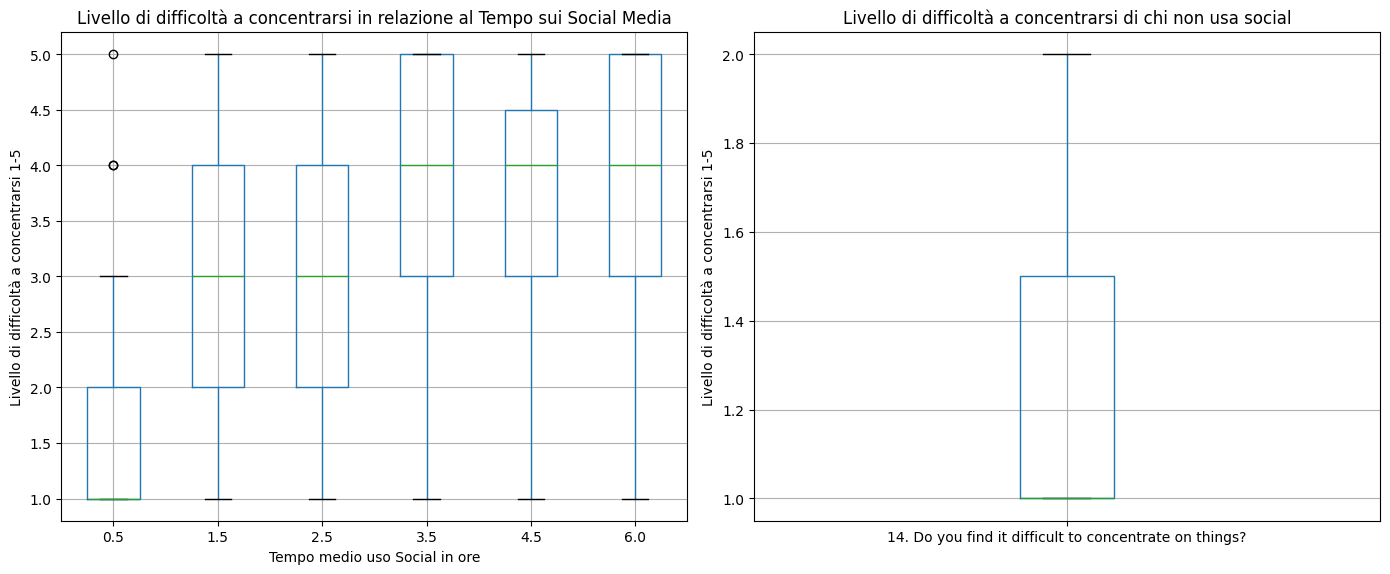

In [39]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# Primo boxplot per la difficoltà a concentrarsi degli utenti dei social media
yesSocial.boxplot(
    column="14. Do you find it difficult to concentrate on things?", 
    by="AverageTimeCode", 
    ax=axes[0]
)
axes[0].set_title("Livello di difficoltà a concentrarsi in relazione al Tempo sui Social Media")
axes[0].set_xlabel("Tempo medio uso Social in ore")
axes[0].set_ylabel("Livello di difficoltà a concentrarsi 1-5")

# Secondo boxplot per la difficoltà a concentrarsi di chi non usa i social
noSocial.boxplot(
    column="14. Do you find it difficult to concentrate on things?",
    ax=axes[1]
)
axes[1].set_title("Livello di difficoltà a concentrarsi di chi non usa social")
axes[1].set_xlabel("")  # Rimosso l'etichetta dell'asse x che era erroneamente duplicata
axes[1].set_ylabel("Livello di difficoltà a concentrarsi 1-5")


plt.suptitle("")
plt.tight_layout()
plt.show()

### Depressione

Procediamo con il boxplot per la visualizzazione della correlazione tra Depressione e l'utilizzo dei social


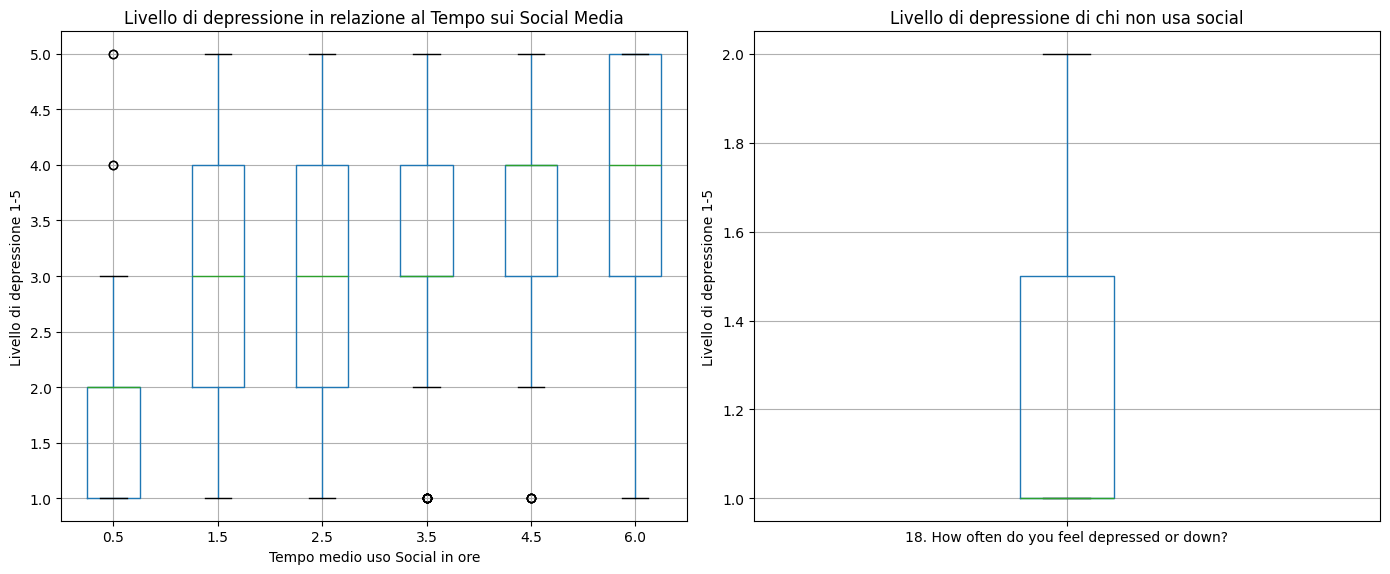

In [40]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 riga, 2 colonne

# Primo boxplot per il livello di depressione degli utenti dei social media
yesSocial.boxplot(
    column="18. How often do you feel depressed or down?", 
    by="AverageTimeCode", 
    ax=axes[0]
)
axes[0].set_title("Livello di depressione in relazione al Tempo sui Social Media")
axes[0].set_xlabel("Tempo medio uso Social in ore")
axes[0].set_ylabel("Livello di depressione 1-5")

# Secondo boxplot per il livello di depressione di chi non usa i social
noSocial.boxplot(
    column="18. How often do you feel depressed or down?",
    ax=axes[1]
)
axes[1].set_title("Livello di depressione di chi non usa social")
axes[1].set_xlabel("")
axes[1].set_ylabel("Livello di depressione 1-5")


plt.suptitle("")
plt.tight_layout()
plt.show()


### Studenti e Depressione

Procediamo con il boxplot per la visualizzazione della depressione negli Studenti, che siano universitari o della scuola dell'obbligo 

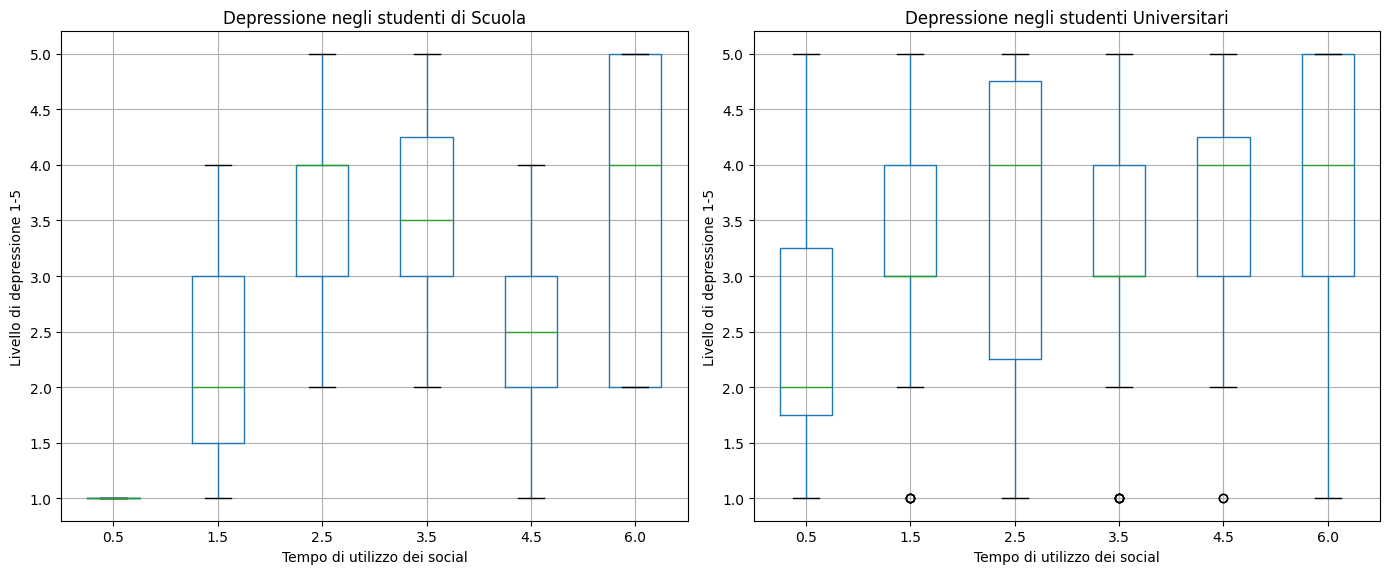

In [ ]:
schoolStudents = dataSetNumeric[dataSetNumeric['OccupationCode'] == 0 ]
universityStudents = dataSetNumeric[dataSetNumeric['OccupationCode'] == 1 ]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 riga, 2 colonne

# Primo boxplot per il livello di depressione degli studenti di scuola
schoolStudents.boxplot(
    column="18. How often do you feel depressed or down?", 
    by="AverageTimeCode", 
    ax=axes
)
axes[0].set_title("Depressione negli studenti di Scuola")
axes[0].set_xlabel("Tempo di utilizzo dei social")
axes[0].set_ylabel("Livello di depressione 1-5")

# Secondo boxplot per il livello di depressione degli studenti universitari
universityStudents.boxplot(
    column="18. How often do you feel depressed or down?", 
    by="AverageTimeCode", 
    ax=axes[1]
)
axes[1].set_title("Depressione negli studenti Universitari")
axes[1].set_xlabel("Tempo di utilizzo dei social")
axes[1].set_ylabel("Livello di depressione 1-5")


plt.suptitle("")
plt.tight_layout()

# Mostrare la figura
plt.show()

# T Test

Per la preparazione del T Test, creo una nuova colonna, il mentalScore.

#### Ipotesi Nulla

Non esiste una differenza significativa nel livello medio di disagio mentale tra chi usa poco e chi usa molto i social media.

### Ipotesi Alternativa

Esiste una differenza significativa nel livello medio di disagio mentale tra chi usa poco e chi usa molto i social media.

### MentalScore

La colonna mentalScore è data dalla media delle risposte alle domande sui problemi psicologici che le persone riscontrano.




P-value 7.964754200443527e-15
Rigettiamo ipotesi nulla in favore della alternativa 


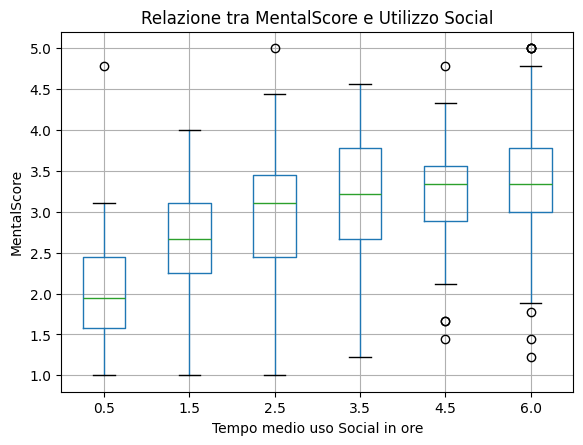

In [42]:
problems = [
    "12. On a scale of 1 to 5, how easily distracted are you?",
    "11. Do you feel restless if you haven't used Social media in a while?",
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "14. Do you find it difficult to concentrate on things?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?",
    "17. How often do you look to seek validation from features of social media?",
    "18. How often do you feel depressed or down?",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
]

dataSetNumeric["mentalScore"] = dataSetNumeric[problems].mean(axis=1)

dataSetNumeric.boxplot( column="mentalScore", by ="AverageTimeCode" )
plt.title("Relazione tra MentalScore e Utilizzo Social")
plt.suptitle("")
plt.xlabel("Tempo medio uso Social in ore")
plt.ylabel("MentalScore")


lowUsage = dataSetNumeric[dataSetNumeric["AverageTimeCode"] <= 3]["mentalScore"]
highUsage = dataSetNumeric[dataSetNumeric["AverageTimeCode"]  > 3]["mentalScore"]

alpha = 0.05
t_test, p_value = stats.ttest_ind(lowUsage, highUsage)
print("P-value", p_value)

if p_value > alpha :
    print("Non possiamo rigettare ipotesi nulla")
elif p_value < alpha :
    if alpha/p_value > 100:
        print("Rigettiamo ipotesi nulla in favore della alternativa ")
    else:
        print("Rigetto l'ipotesi nulla ma non accetto l'alternativa")


# One-Hot encoding per Metodo Predittivo


In [43]:
dataSetNumeric.head(20)

#colonna GenderCode
dataSetNumeric["Male"] = (dataSetNumeric["GenderCode"] == 2).astype(int)
dataSetNumeric["Female"] = (dataSetNumeric["GenderCode"] == 1).astype(int)
dataSetNumeric["OtherGender"] = (dataSetNumeric["GenderCode"] == 0).astype(int)

dataSetNumeric.drop(columns=['GenderCode'], inplace=True)

#colonna OccupationCode
dataSetNumeric['Student'] = (dataSetNumeric['OccupationCode'] == 0).astype(int)
dataSetNumeric['Universitario'] = (dataSetNumeric['OccupationCode'] == 1).astype(int)
dataSetNumeric['Lavoratore'] = (dataSetNumeric['OccupationCode'] == 2).astype(int)
dataSetNumeric['Pensionato'] = (dataSetNumeric['OccupationCode'] == 3).astype(int)

dataSetNumeric.drop(columns=['OccupationCode'], inplace=True)

#colonna RelationshipCode
dataSetNumeric['Single'] = (dataSetNumeric['RelationshipCode'] == 0).astype(int)
dataSetNumeric['In a relationship'] = (dataSetNumeric['RelationshipCode'] == 1).astype(int)
dataSetNumeric['Married'] = (dataSetNumeric['RelationshipCode'] == 2).astype(int)
dataSetNumeric['Divorced'] = (dataSetNumeric['RelationshipCode'] == 3).astype(int)



dataSetNumeric = dataSetNumeric.rename(columns={
    "1. What is your age?": "Age",
    "9. How often do you find yourself using Social media without a specific purpose?": "noPurpose",
    "10. How often do you get distracted by Social media when you are busy doing something?": "distracted",
    "11. Do you feel restless if you haven't used Social media in a while?": "restless",
    "18. How often do you feel depressed or down?": "depressed"
})  


#normalizzazione della colonna "Age"
min_age = dataSetNumeric['Age'].min()
max_age = dataSetNumeric['Age'].max()
dataSetNumeric['Age_Normalized'] = (dataSetNumeric['Age'] - min_age) / (max_age - min_age)

#normalizzazione della colonna "AverageTimeCode"
min_time = dataSetNumeric['AverageTimeCode'].min()
max_time = dataSetNumeric['AverageTimeCode'].max()  
dataSetNumeric['AvgTime_Normalized'] = (dataSetNumeric['AverageTimeCode'] - min_time) / (max_time - min_time)




Dal risultato del T-Test si evince che vi è una correlazione tra l'utilizzo dei social e uno score alto di "disagio mentale".

Ho creato una media tra le valutazioni per stabilire uno score di stato mentale e calcolare la correlazione tra l'utilizzo social.

# Metodo Predittivo



     Age_Normalized  AvgTime_Normalized  SocialCode  Male  Female  OtherGender  Single  In a relationship  Married  Divorced  Student  Universitario  Lavoratore  Pensionato  Company  Goverment  Private  School  University  Other
228        0.423077            0.000000           1     1       0            0       0                  0        1         0        0              0           1           0        1          0        1       0           0      0
474        0.217949            0.727273           1     0       1            0       0                  0        1         0        0              0           1           0        0          0        0       0           1      0
42         0.551282            0.181818           1     0       1            0       0                  0        1         0        0              0           0           1        0          0        0       0           0      1
261        0.102564            0.363636           1     0       1            0      

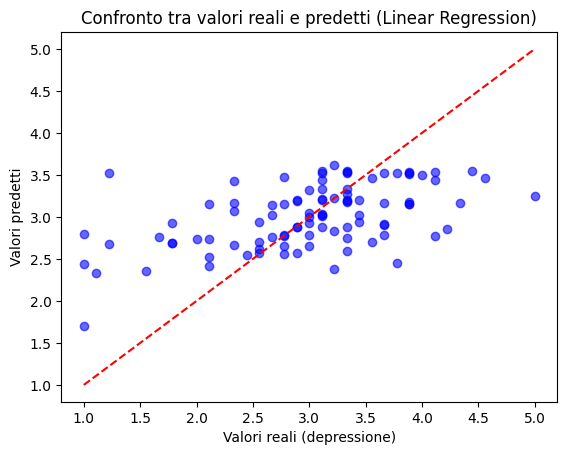

MAE: 0.5244253457912256
MSE: 0.48887268828867536
RMSE: 0.6991943136844545


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


columns = [
    "Age_Normalized", "AvgTime_Normalized", "SocialCode",
    "Male", "Female", "OtherGender",
    "Single", "In a relationship", "Married", "Divorced",
    "Student", "Universitario", "Lavoratore", "Pensionato",
    "Company", "Goverment", "Private", "School", "University", "Other"

]


X = dataSetNumeric[columns]
y = dataSetNumeric["mentalScore"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# setting pandas per visualizzare la matrice completa
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
print(X_train )


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

plt.scatter(y_test, lr_predictions, alpha=0.6, color='blue')
plt.xlabel("Valori reali (depressione)")
plt.ylabel("Valori predetti")
plt.title("Confronto tra valori reali e predetti (Linear Regression)")
plt.plot([1, 5], [1, 5], color='red', linestyle='--') 
plt.show()

print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))
